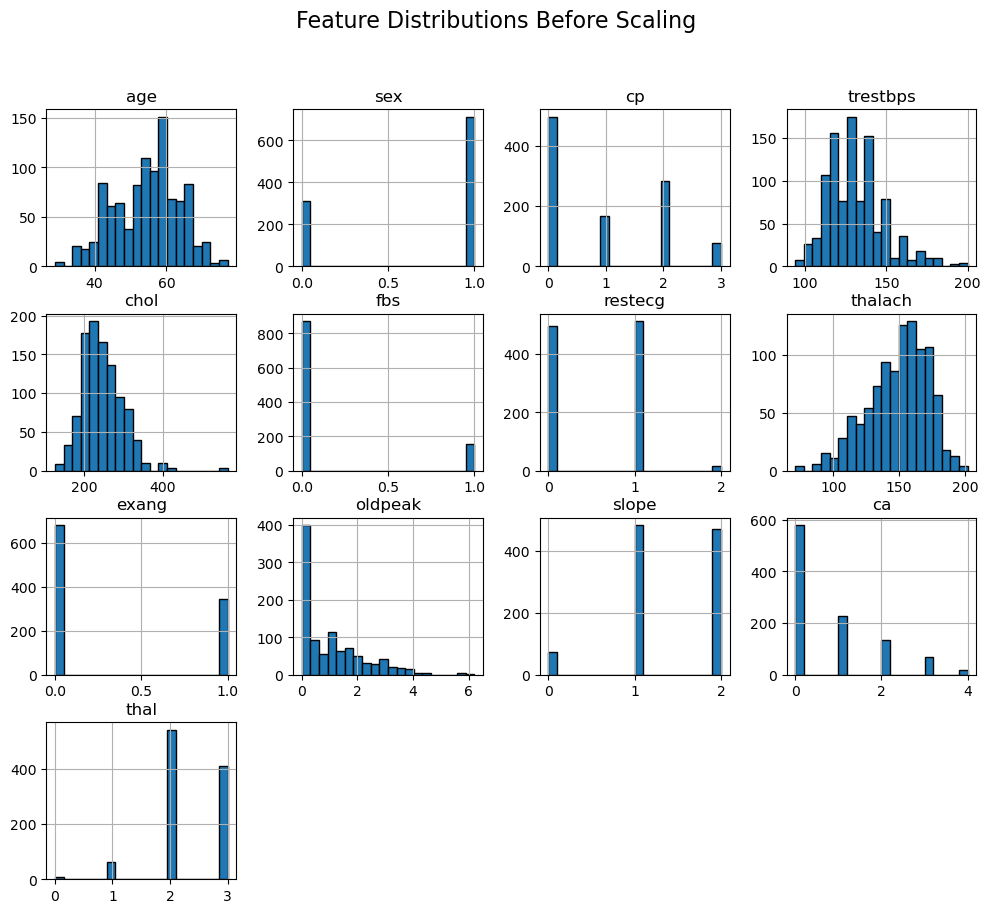

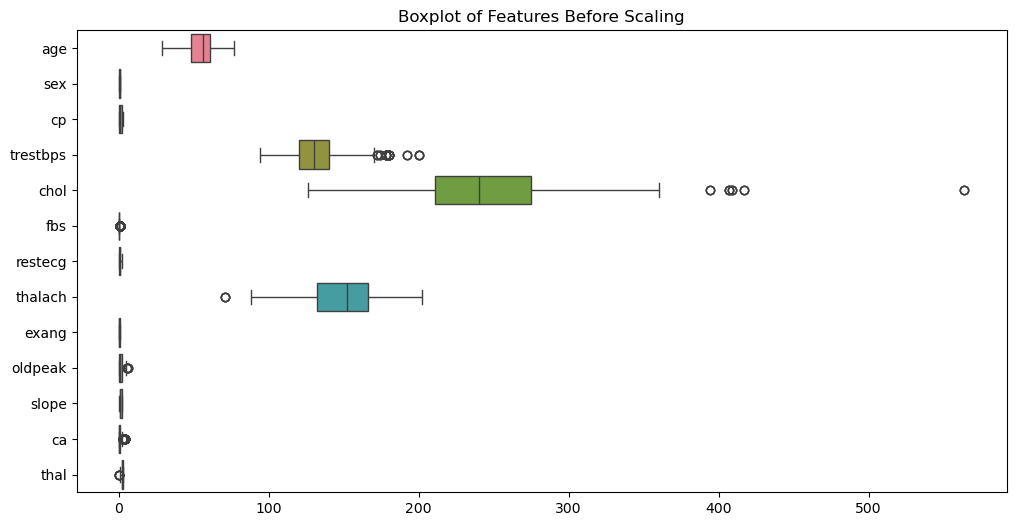

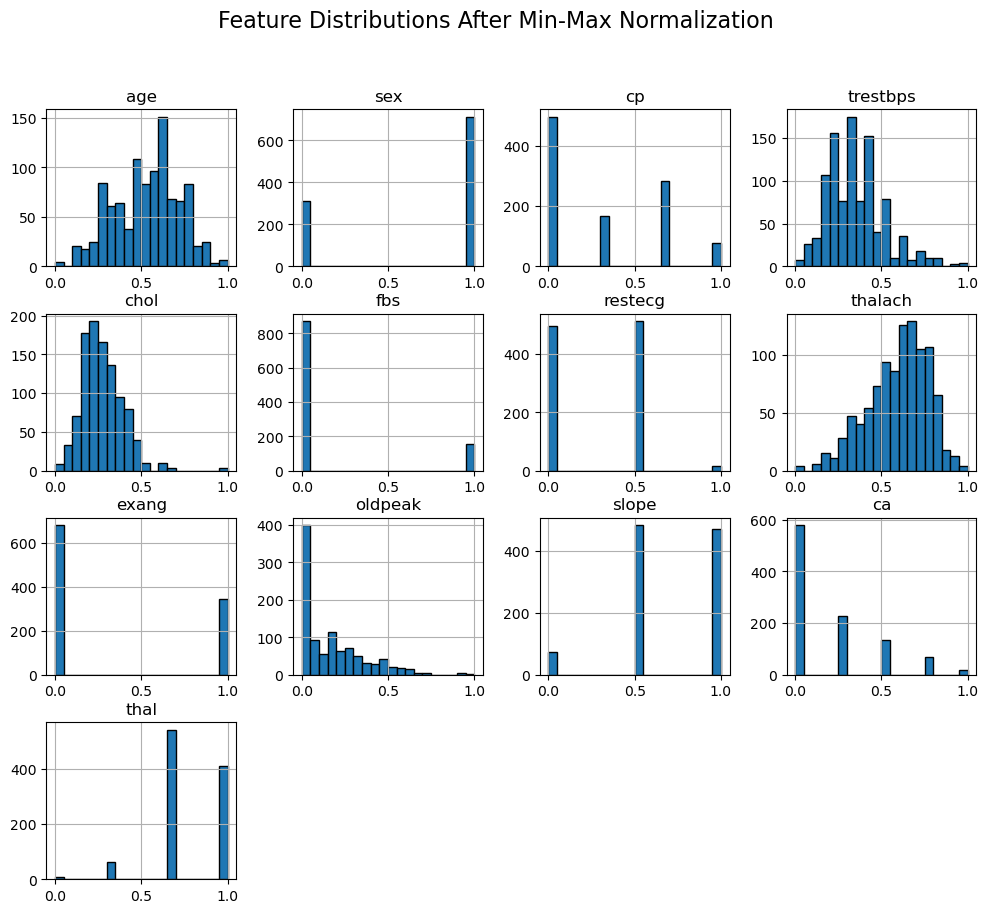

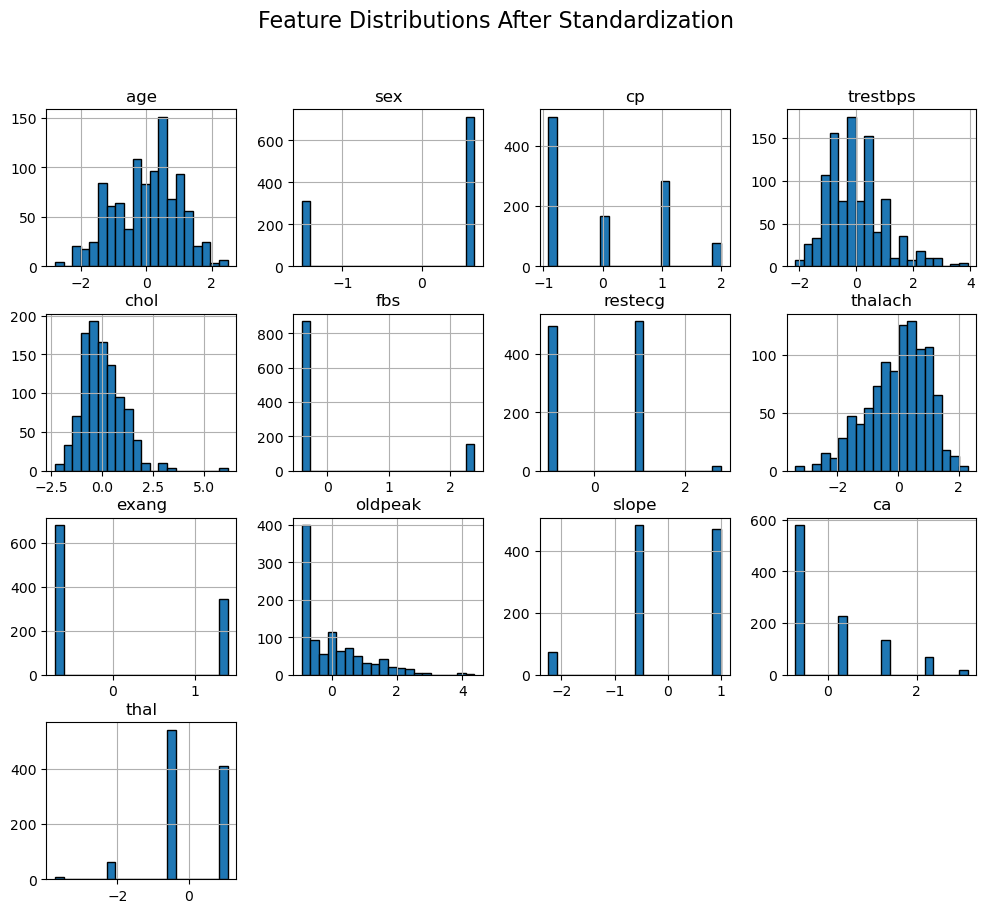

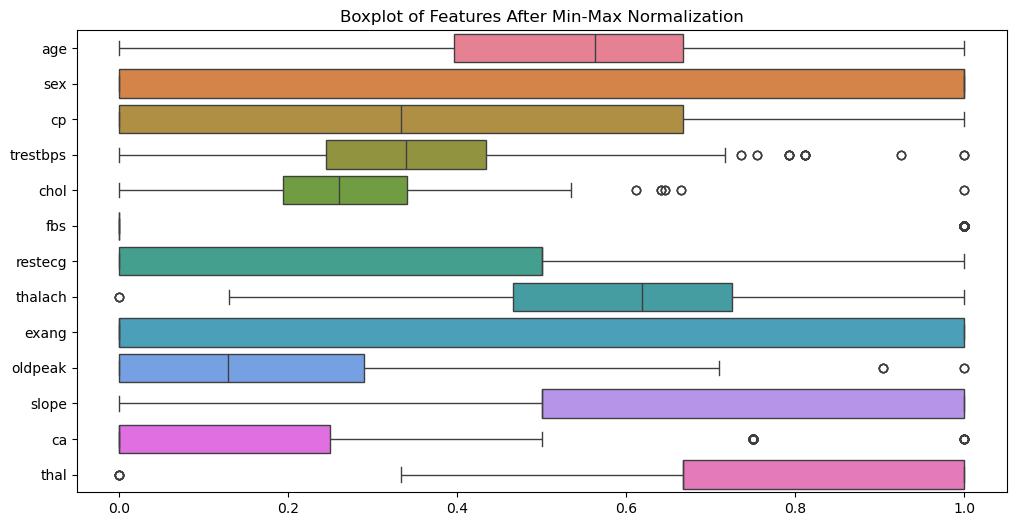

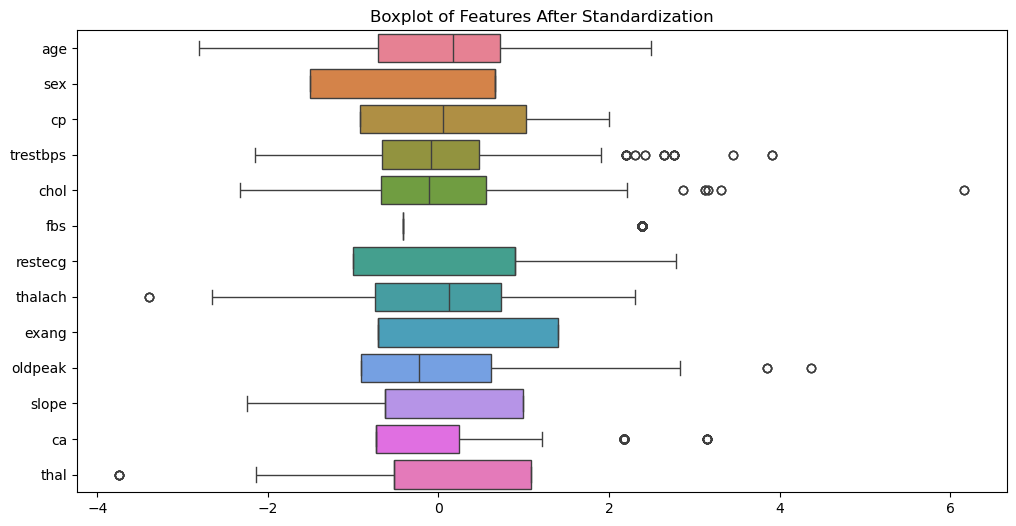

Original Data (first 5 rows):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  

After Min-Max Normalization (0-1 range):
        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0

In [7]:
# --- Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# --- Load dataset ---
df = pd.read_csv("heart.csv") 

# Separate features and target
X = df.drop("target", axis=1) 
y = df["target"]              
# -------------------------
# 1. EDA Visualization (Before Scaling)
# -------------------------

# Histogram before scaling
X.hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions Before Scaling", fontsize=16)
plt.show()

# Boxplot before scaling
plt.figure(figsize=(12,6))
sns.boxplot(data=X, orient="h")
plt.title("Boxplot of Features Before Scaling")
plt.show()
# 2. Normalization (Min-Max Scaling: 0–1 range)
# -------------------------
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# -------------------------
# 3. Standardization (Z-score Scaling: mean=0, std=1)
# -------------------------
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

# -------------------------
# 4. EDA Visualization (After Scaling)
# -------------------------

# Histogram after Min-Max Scaling
X_normalized_df.hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions After Min-Max Normalization", fontsize=16)
plt.show()

# Histogram after Standardization
X_standardized_df.hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions After Standardization", fontsize=16)
plt.show()

# Boxplot after Min-Max Scaling
plt.figure(figsize=(12,6))
sns.boxplot(data=X_normalized_df, orient="h")
plt.title("Boxplot of Features After Min-Max Normalization")
plt.show()

# Boxplot after Standardization
plt.figure(figsize=(12,6))
sns.boxplot(data=X_standardized_df, orient="h")
plt.title("Boxplot of Features After Standardization")
plt.show()

# -------------------------
# 5. Interpretation (Print few rows for comparison)
# -------------------------
print("Original Data (first 5 rows):")
print(X.head())

print("\nAfter Min-Max Normalization (0-1 range):")
print(X_normalized_df.head())

print("\nAfter Standardization (mean=0, std=1):")
print(X_standardized_df.head())